In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

from scipy.stats.mstats import gmean 

baseline_raw = pd.read_csv("baseline.csv")
dense_raw = pd.read_csv("dense_gpu.csv")
coo_raw = pd.read_csv("sparse_coo.csv")
csr_raw = pd.read_csv("sparse_csr.csv")

# med_speedup = pd.DataFrame(data=baseline_raw["num_nodes"])
# med_speedup["dense"] = baseline_raw["med"] / dense_raw["med"]
# med_speedup["coo"] = baseline_raw["med"] / coo_raw["med"]
# med_speedup["csr"] = baseline_raw["med"] / csr_raw["med"]
# med_speedup.to_csv("med_speedups.csv")
# I ended up editing the csv by hand with LibreOffice instead of finangling with pandas

/tmp/ipykernel_136102/3469131168.py:9: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.barplot(


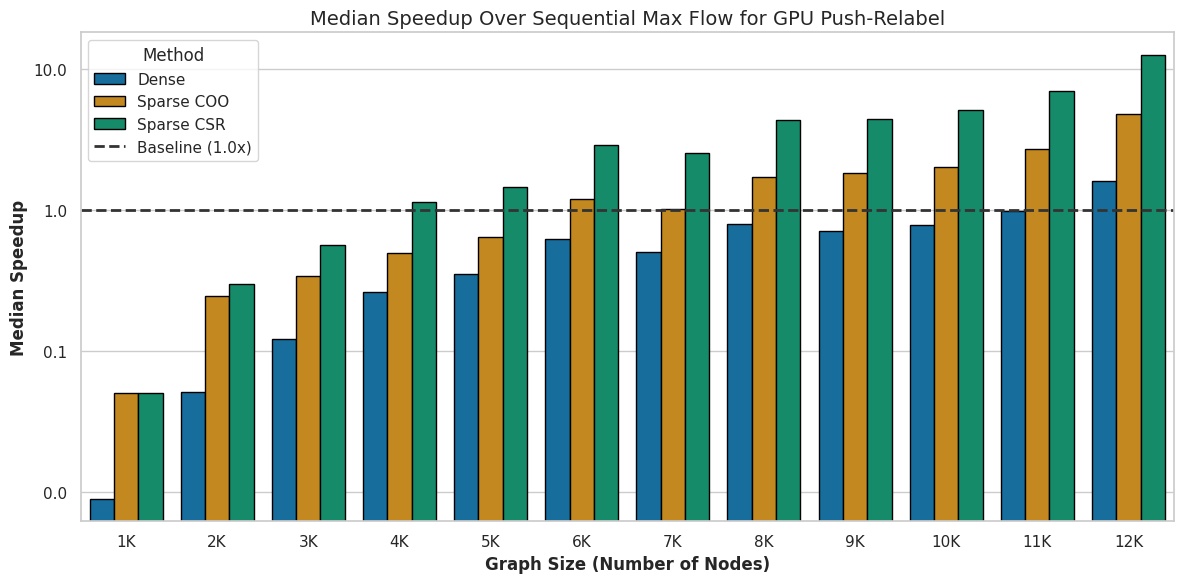

In [72]:
# Plot graph sizes vs med speedups
speedups = pd.read_csv("med_speedups.csv")

sns.set_theme(style="whitegrid")
palette = sns.color_palette("colorblind")

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=speedups,
    x='num_nodes',
    y='speedup',
    hue='impl',
    palette=palette,
    edgecolor='black',  # Adds a border to bars for better contrast
    linewidth=1
)
ax.set_yscale('log')

# Add dotted line for baseline (using black/grey instead of red for neutrality)
ax.axhline(y=1, color='#333333', linestyle='--', linewidth=2, label='Baseline (1.0x)')

# Log scale defaults to scientific notation (10^0, 10^1). 
# Force it to use scalar numbers (0.5, 1, 2, 5)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(ticker.NullFormatter()) # Hide minor ticks to reduce clutter
# ax.set_yticks([0.5, 1, 2, 4]) # Manually set relevant ticks if needed

ax.set_ylabel('Median Speedup', fontweight='bold')
ax.set_xlabel('Graph Size (Number of Nodes)', fontweight='bold')
ax.set_title('Median Speedup Over Sequential Max Flow for GPU Push-Relabel', fontsize=14)
ax.legend(title='Method')

plt.tight_layout()
plt.savefig('log_speedup_plot.png')

         impl     gmean
0       Dense  0.319796
1  Sparse COO  0.849860
2  Sparse CSR  1.770229


/tmp/ipykernel_136102/3287535438.py:15: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  ax = sns.barplot(


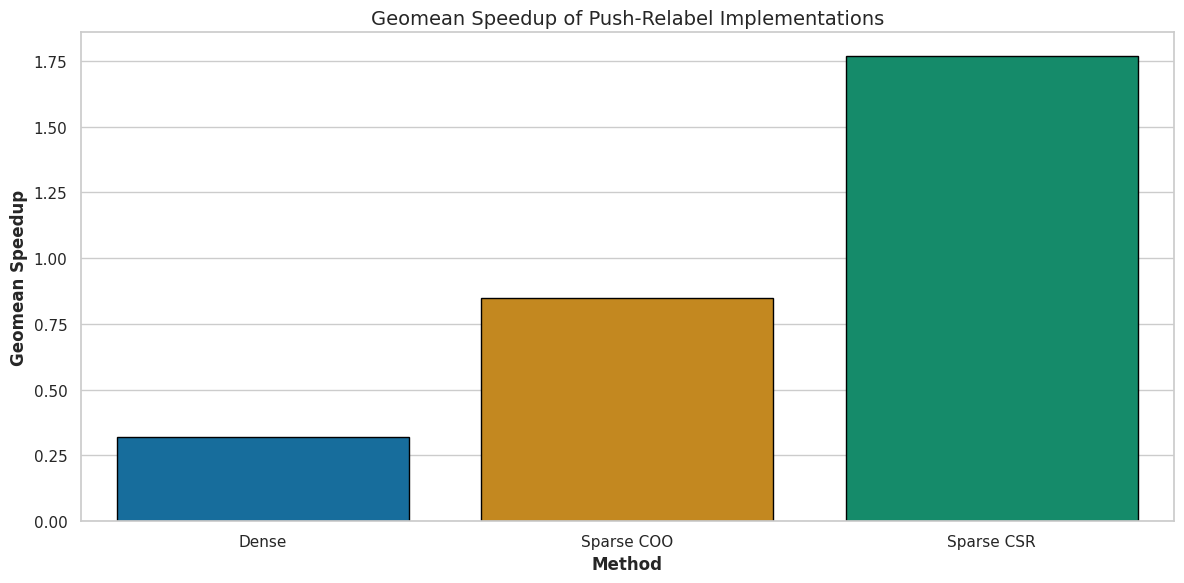

In [73]:
dense_geomean = gmean(np.asarray(baseline_raw["med"] / dense_raw["med"]))
coo_geomean = gmean(np.asarray(baseline_raw["med"] / coo_raw["med"]))
csr_geomean = gmean(np.asarray(baseline_raw["med"] / csr_raw["med"]))

data = {'impl': ['Dense', 'Sparse COO', 'Sparse CSR'],
        'gmean': [dense_geomean, coo_geomean, csr_geomean]}
geomean_speedup = pd.DataFrame(data)
print(geomean_speedup)

sns.set_theme(style="whitegrid")
palette = sns.color_palette("colorblind")

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=geomean_speedup,
    x='impl',
    y='gmean',
    hue='impl',
    palette=palette,
    edgecolor='black',  # Adds a border to bars for better contrast
    linewidth=1
)

ax.set_ylabel('Geomean Speedup', fontweight='bold')
ax.set_xlabel('Method', fontweight='bold')
ax.set_title('Geomean Speedup of Push-Relabel Implementations', fontsize=14)

plt.tight_layout()
plt.savefig('gmean_speedup_plot.png')

/tmp/ipykernel_136102/2265457839.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.lineplot(


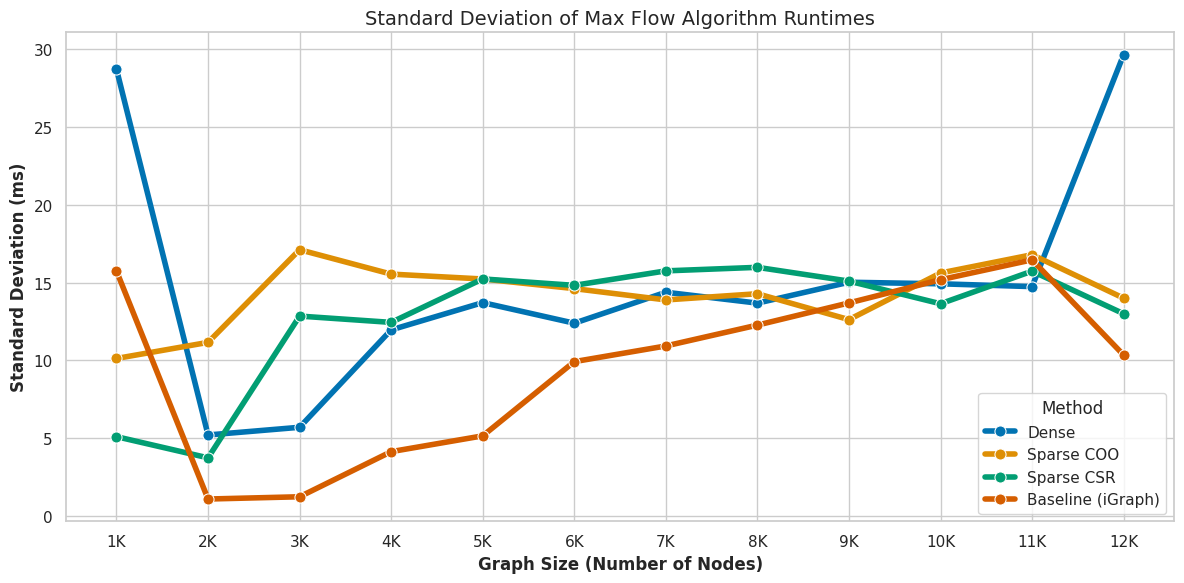

In [69]:
# Plot graph sizes vs std deviations
speedups = pd.read_csv("distr.csv")

sns.set_theme(style="whitegrid")
palette = sns.color_palette("colorblind")

plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=speedups,
    x='num_nodes',
    y='std_dev',
    hue='impl',
    palette=palette,
    marker='o',         # Adds dots for each x-point
    markersize=8,     # Adjusts the size of the dots
    linewidth=4
)

ax.set_ylabel('Standard Deviation (ms)', fontweight='bold')
ax.set_xlabel('Graph Size (Number of Nodes)', fontweight='bold')
ax.set_title('Standard Deviation of Max Flow Algorithm Runtimes', fontsize=14)
ax.legend(title='Method')

plt.tight_layout()
plt.savefig('std_dev_plot.png')

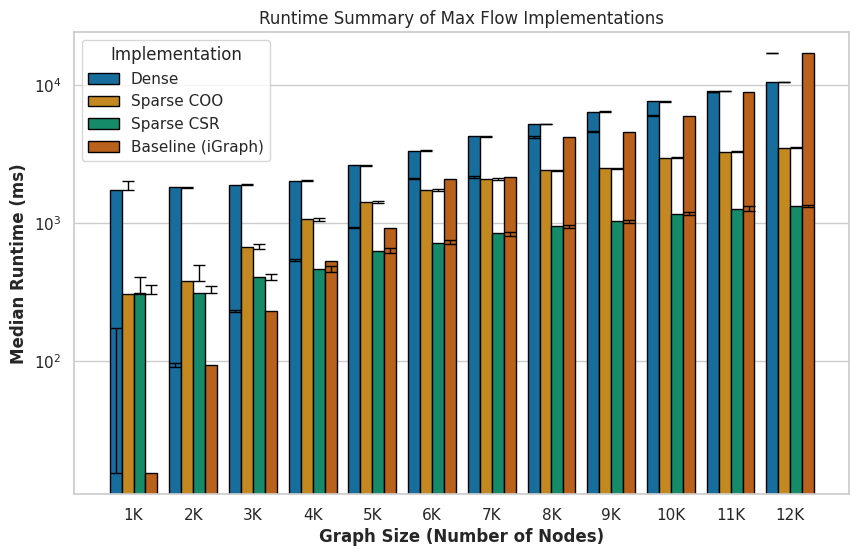

In [70]:
df = pd.read_csv("raw.csv")
# 1. Calculate Asymmetric Error Distances
# Matplotlib needs the distance FROM the median, not the absolute value.
df['err_lower'] = df['med'] - df['low']
df['err_upper'] = df['high'] - df['med']

# 2. Setup Seaborn Aesthetics
# Use a color-blind friendly palette
sns.set_theme(style="whitegrid", palette="colorblind")
fig, ax = plt.subplots(figsize=(10, 6))

# 3. SEABORN: Plot the main bars (Median height, grouped by Implementation)
sns.barplot(
    data=df,
    x='num_nodes',
    y='med',
    hue='impl',
    ax=ax,
    errorbar=None, # Crucial: disable Seaborn's default error calculation
    edgecolor='black'
)

# --- 4. MATPLOTLIB: Overlay Error Bars ---

# This loop gets the position of each bar (x-coordinate) and plots the custom error bar
# We must plot the error bars after the bars are drawn.
for container in ax.containers:
    for patch in container.patches:
        x = patch.get_x() + patch.get_width() / 2 # Center X position of the bar
        
        # Find the corresponding data point using the categorical labels
        node_label = patch.get_label() if patch.get_label() else ax.get_xticklabels()[int(x)].get_text()
        
        # Find the implementation group for this bar (requires manual grouping logic)
        # Simplest approach: group by 'impl' and iterate over positions (0, 1, 2...)
        
        # Simplified retrieval: sort the data like Seaborn does and iterate
        df_grouped = df.sort_values(by=['num_nodes', 'impl'])
        
        # Find the data point that matches the position (0, 1, 2, ...) and height
        # This is complex, so we'll simplify the loop by using the barplot's internal data structure
        
        # Resetting to a cleaner loop based on data index, assuming Seaborn ordering
        
        # NOTE: Due to the complexity of aligning error bars on grouped categorical plots,
        # we rely on the index order, which is reliable if the DataFrame is sorted.
        
# Simpler, reliable plotting requires re-indexing based on Seaborn's internal mapping:
# A cleaner solution is to plot the error bars directly without relying on bar patches.

# Let's use the errorbar function on the mean of the x positions for each category.

# We will loop through the grouped data and manually set the x-positions.
group_width = 0.8 / len(df['impl'].unique()) # 0.8 is the default width of the bar group

for i, (name, group) in enumerate(df.groupby('impl')):
    x_positions = np.arange(len(group)) + (i - len(df['impl'].unique()) / 2 + 0.5) * group_width
    
    # Build the custom asymmetric error array for this group
    yerr_custom = np.array([group['err_lower'].values, group['err_upper'].values])
    
    # Overlay the error bars
    ax.errorbar(
        x_positions,
        group['med'],
        yerr=yerr_custom,
        fmt='none',       # No line or marker
        capsize=4,
        color='black',
        elinewidth=1
    )
    
# 5. Final Formatting
ax.set_ylabel('Median Runtime (ms)', fontweight='bold')
ax.set_xlabel('Graph Size (Number of Nodes)', fontweight='bold')
ax.set_title('Runtime Summary of Max Flow Implementations')
ax.legend(title='Implementation')

# Set y-axis to log scale, as runtimes typically vary drastically
plt.yscale('log')
plt.savefig('summary_bar_plot.png')

/tmp/ipykernel_136102/2372604412.py:15: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(


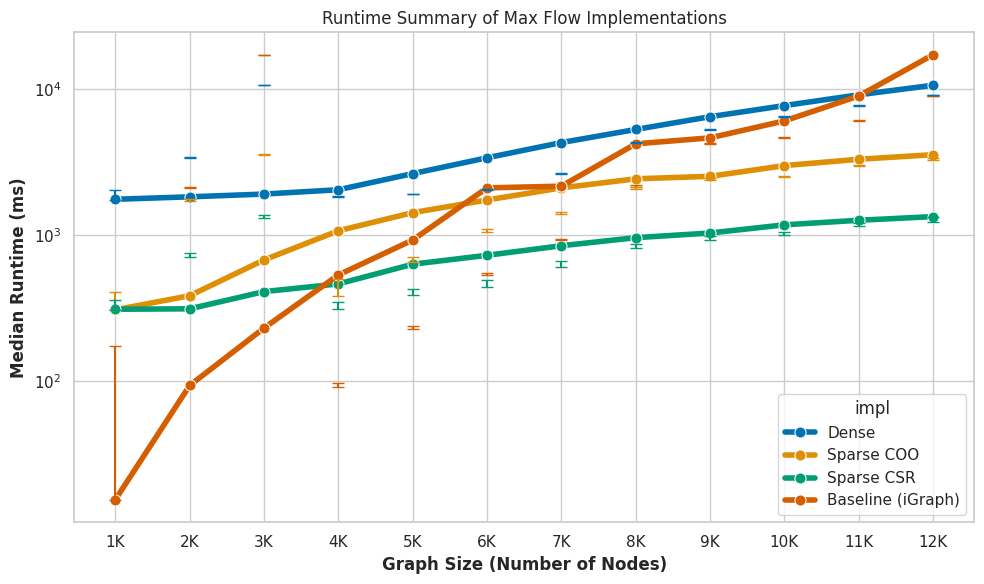

In [71]:
df = pd.read_csv("raw.csv")
# Sort the data by 'num_nodes' categorical order for reliable plotting
# df = df.sort_values(by='num_nodes', key=lambda x: x.map({'1K': 1, '6K': 2, '12K': 3}))

# 1. Calculate Asymmetric Error Distances
df['err_lower'] = df['med'] - df['low']
df['err_upper'] = df['high'] - df['med']

# 2. Setup Plot and Aesthetics
sns.set_theme(style="whitegrid", palette="colorblind")
fig, ax = plt.subplots(figsize=(10, 6))

# 3. SEABORN: Plot the main lines and markers (Median height and grouping)
# Seaborn sets up the X-axis categories (0, 1, 2...)
sns.lineplot(
    data=df,
    x='num_nodes',
    y='med',
    hue='impl',
    palette=palette,
    marker='o',         # Adds dots for each x-point
    markersize=8,     # Adjusts the size of the dots
    linewidth=4,
    legend=True
)

# 4. MATPLOTLIB: Overlay Custom Error Bars
# We must plot the error bars at the categorical positions (0, 1, 2, ...)

# Get the categorical labels for x-positioning
num_categories = len(df['num_nodes'].unique())

# Loop over each implementation group
for name, group in df.groupby('impl'):
    # Sort the group by the categorical x-axis for alignment
    group_sorted = group.sort_values(by='num_nodes', key=lambda x: x.map({'1K': 1, '6K': 2, '12K': 3}))

    # X-positions are simple indices: 0, 1, 2, ...
    x_positions = np.arange(num_categories)
    
    # Create the 2xN error array: [[lower_errors], [upper_errors]]
    yerr_custom = np.array([group_sorted['err_lower'].values, group_sorted['err_upper'].values])
    
    # Get the color used by Seaborn for this line/group
    line = ax.lines[[l.get_label() for l in ax.lines].index(name)]
    line_color = line.get_color()

    # Overlay the error bars
    ax.errorbar(
        x_positions,
        group_sorted['med'],
        yerr=yerr_custom,
        fmt='none',       # Do not draw a line or marker
        capsize=4,
        color=line_color, # Use the color matching the line
        elinewidth=1.5
    )

# 5. Final Formatting
plt.yscale('log')
ax.set_ylabel('Median Runtime (ms)', fontweight='bold')
ax.set_xlabel('Graph Size (Number of Nodes)', fontweight='bold')
ax.set_title('Runtime Summary of Max Flow Implementations')

plt.tight_layout()
plt.savefig('summary_line_plot.png')